# Predict the salary if the employee using the features provided in the data. 

In [111]:
#importent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
#read data
df = pd.read_csv('Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# In this dataset clearly see - salay is output and all other are features.

In [113]:
#data discribe and chack is there any null value present or not
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# Null values are not present in this dataset. but we can say that discipline and sex column is not importent for modal.

In [114]:
#droping 

In [115]:
df = df.drop(columns=['sex','discipline','rank'])

In [116]:
df.isnull().sum()

yrs.since.phd    0
yrs.service      0
salary           0
dtype: int64

# chack null value by using heatmap

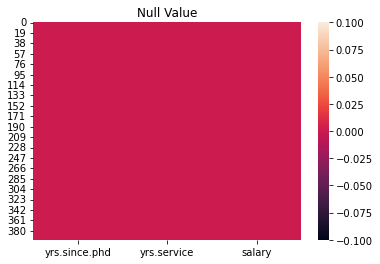

In [117]:
sns.heatmap(df.isnull())
plt.title('Null Value')
plt.show()

# Correlations

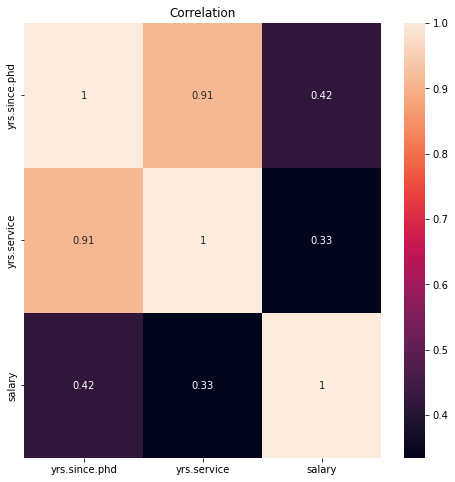

In [118]:
#heatmap
plt.figure(figsize=(8,8),facecolor='white')
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation')
plt.show()

# year of service and year since phd in high co-related with each other so drop one of them

In [119]:
df = df.drop(columns=['yrs.since.phd'])

In [120]:
df.describe()

,yrs.service,salary
count,397.000000,397.000000
mean,17.614610,113706.458438
std,13.006024,30289.038695
min,0.000000,57800.000000
25%,7.000000,91000.000000
50%,16.000000,107300.000000
75%,27.000000,134185.000000
max,60.000000,231545.000000


# As we are seeing max = 60 which is not possible and also min = 0 which is also not possible so drop some of data 

In [121]:
df['yrs.service'] = df['yrs.service'].replace(0,df['yrs.service'].mean())

In [122]:
max_ = df['yrs.service'].max(axis=0)
max_

60.0

In [123]:
range_year =np.where(df['yrs.service']>40)
range_year =list(range_year)
print(range_year)
type(range_year)

[array([  4,   7,  71, 125, 131, 194, 261, 266, 268, 276, 279, 282, 283,
       285, 298, 304, 317, 330, 350, 364, 383], dtype=int64)]


list

In [124]:
df = df.drop(df.index[range_year])

C:\Users\rupen\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [125]:
df=df.dropna()

In [126]:
df.describe()

,yrs.service,salary
count,376.000000,376.000000
mean,16.488725,113410.409574
std,10.891571,29420.346137
min,1.000000,62884.000000
25%,7.000000,91281.750000
50%,16.000000,107304.500000
75%,24.250000,133337.750000
max,40.000000,231545.000000


# data distributions

C:\Users\rupen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rupen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


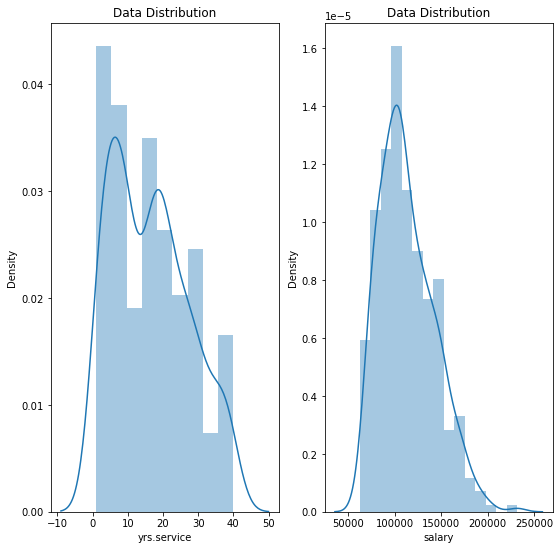

In [127]:
plt.figure(figsize=(9,9),facecolor='white')
plot = 1
for column in df:
    if plot<=2:
        plt.subplot(1,2,plot)
        sns.distplot(df[column])
        plt.title("Data Distribution")
        plt.xlabel(column)
    plot+=1
plt.show()
        

# As we seen some skweness so need to chack skweness of data

In [128]:
# split data into feature and lebal

In [129]:
df.rename(columns={'yrs.service':'year'},inplace=True)

In [130]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

In [131]:
high = q3.year + (iqr.year*1.50)
print(high)
index = np.where(df["year"]>high)
print(index)
df = df.drop(df.index[index])
df.reset_index()

50.125
(array([], dtype=int64),)


,index,year,salary
0,0,18.0,139750
1,1,16.0,173200
2,2,3.0,79750
3,3,39.0,115000
4,5,6.0,97000
...,...,...,...
371,392,30.0,103106
372,393,19.0,150564
373,394,25.0,101738
374,395,15.0,95329


In [132]:
df.describe()

,year,salary
count,376.000000,376.000000
mean,16.488725,113410.409574
std,10.891571,29420.346137
min,1.000000,62884.000000
25%,7.000000,91281.750000
50%,16.000000,107304.500000
75%,24.250000,133337.750000
max,40.000000,231545.000000


# Chack outliers

C:\Users\rupen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rupen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


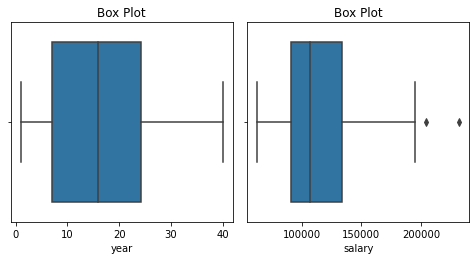

In [134]:
plt.figure(figsize=(10,10),facecolor='white')
plot = 1
for column in df:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plt.title("Box Plot")
    plot+=1
plt.tight_layout()

# Some outlier is present in salary column so need to drop of them

In [137]:
high = q3.salary + (iqr.salary*1.50)
print(high)
index = np.where(df['salary']>high)
print(index)
df = df.drop(df.index[index])
df.reset_index()

196421.75
(array([ 41, 243], dtype=int64),)


,index,year,salary
0,0,18.0,139750
1,1,16.0,173200
2,2,3.0,79750
3,3,39.0,115000
4,5,6.0,97000
...,...,...,...
369,392,30.0,103106
370,393,19.0,150564
371,394,25.0,101738
372,395,15.0,95329


In [138]:
df.describe()

,year,salary
count,374.000000,374.000000
mean,16.456579,112852.323529
std,10.852621,28468.742379
min,1.000000,62884.000000
25%,7.000000,91245.250000
50%,16.000000,107225.000000
75%,24.000000,132684.000000
max,40.000000,194800.000000


# Train_test_split_data

In [207]:
x = df.drop(columns=['salary'])
y = df['salary']

In [208]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [209]:
x_new = ss.fit_transform(x)

In [210]:
x_new

array([[ 0.1424069 ],
       [-0.04212725],
       [-1.24159919],
       [ 2.08001543],
       [-0.96479798],
       [ 0.60374226],
       [ 0.32694104],
       [ 0.1424069 ],
       [-0.78026383],
       [-1.33386627],
       [-1.42613334],
       [ 0.10684805],
       [ 0.1424069 ],
       [-1.24159919],
       [ 0.32694104],
       [ 1.61868007],
       [ 0.60374226],
       [ 1.80321421],
       [ 0.88054348],
       [ 1.34187885],
       [ 1.24961177],
       [ 0.23467397],
       [-0.78026383],
       [-0.78026383],
       [ 0.60374226],
       [-1.24159919],
       [ 0.10684805],
       [-0.78026383],
       [-1.14933212],
       [-1.33386627],
       [-0.68799676],
       [-1.33386627],
       [-1.33386627],
       [ 0.10684805],
       [ 0.41920812],
       [-1.14933212],
       [ 1.34187885],
       [-0.68799676],
       [-1.33386627],
       [ 0.60374226],
       [ 0.97281055],
       [ 0.23467397],
       [-0.13439432],
       [ 1.06507763],
       [ 0.23467397],
       [ 0

In [211]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,random_state=20,test_size=0.25)

In [212]:
x_train.shape

(280, 1)

In [213]:
y_train.shape

(280,)

In [214]:
x_test.shape

(94, 1)

In [199]:
y_test.shape

(94,)

# Make a modal

In [221]:
from sklearn.linear_model import LinearRegression

In [222]:
lr = LinearRegression()

In [223]:
lr.fit(x_train,y_train)

LinearRegression()

In [225]:
y_pre = lr.predict(x_test)

In [227]:
print(r2_score(y_test,y_pre))

0.10926173955829999


In [228]:
data = pd.DataFrame({"Actual":y_test,"Predict":y_pre})
data.head(10)

,Actual,Predict
187,107500,106114.760285
94,123683,115884.615986
305,111350,126631.457258
121,124309,127608.442828
114,105000,113554.123959
251,102000,104160.789144
178,147349,110022.702565
59,75044,99275.861294
93,166024,133470.356249
119,73500,99275.861294
